# **Wind Trubine Power**

**Name:** Praveen Choudhary

**Prn :** 23070243065


## **Project : Housing Price**

**Dataset :** https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india

**Github :** https://github.com/Praveen1034/Housing-Price

**Model Applied :** Multi-Regression, SVR, Random Forest, Stacking SVR,Sequential (ANN)

In [1]:
# Install Library
# pip install plotly

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# read data
data = pd.read_excel("Train.xlsx", engine='openpyxl')

data_test = pd.read_csv("Test.csv")

In [41]:
data_test.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m
0,35040,01/01/17 0:00,1,19.6796,89.664205,17.072595,1.085389,0.867799,192.051683,233.057315,1.636515
1,35041,01/01/17 1:00,1,19.1796,90.664205,16.672595,1.665389,1.907799,183.051683,197.057315,2.736515
2,35042,01/01/17 2:00,1,19.5796,88.664205,16.672595,1.845389,2.867799,162.051683,167.057315,2.736515
3,35043,01/01/17 3:00,1,20.3796,85.664205,16.572595,2.325389,3.987799,166.051683,161.057315,2.936515
4,35044,01/01/17 4:00,1,21.0796,82.664205,16.572595,2.265389,4.047799,182.051683,170.057315,3.136515


In [42]:
# Convert `Time` to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%d-%m-%Y %H:%M')

# Extract time-related features
data['Hour'] = data['Time'].dt.hour  # Extract hour
data['DayOfWeek'] = data['Time'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)
data['Month'] = data['Time'].dt.month  # Extract month
data['DayOfYear'] = data['Time'].dt.dayofyear  # Extract day of the year

# Optional: Cyclical encoding for hour feature
data['Hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
data['Hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)

In [44]:
# Convert `Time` to datetime format
data_test['Time'] = pd.to_datetime(data_test['Time'], format='%d/%m/%y %H:%M') # Changed the format to match the test data

# Extract time-related features
data_test['Hour'] = data_test['Time'].dt.hour  # Extract hour
data_test['DayOfWeek'] = data_test['Time'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)
data_test['Month'] = data_test['Time'].dt.month  # Extract month
data_test['DayOfYear'] = data_test['Time'].dt.dayofyear  # Extract day of the year

# Optional: Cyclical encoding for hour feature
data_test['Hour_sin'] = np.sin(2 * np.pi * data_test['Hour'] / 24)
data_test['Hour_cos'] = np.cos(2 * np.pi * data_test['Hour'] / 24)

In [45]:
data_test.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Hour,DayOfWeek,Month,DayOfYear,Hour_sin,Hour_cos
0,35040,2017-01-01 00:00:00,1,19.6796,89.664205,17.072595,1.085389,0.867799,192.051683,233.057315,1.636515,0,6,1,1,0.000000,1.000000
1,35041,2017-01-01 01:00:00,1,19.1796,90.664205,16.672595,1.665389,1.907799,183.051683,197.057315,2.736515,1,6,1,1,0.258819,0.965926
2,35042,2017-01-01 02:00:00,1,19.5796,88.664205,16.672595,1.845389,2.867799,162.051683,167.057315,2.736515,2,6,1,1,0.500000,0.866025
3,35043,2017-01-01 03:00:00,1,20.3796,85.664205,16.572595,2.325389,3.987799,166.051683,161.057315,2.936515,3,6,1,1,0.707107,0.707107
4,35044,2017-01-01 04:00:00,1,21.0796,82.664205,16.572595,2.265389,4.047799,182.051683,170.057315,3.136515,4,6,1,1,0.866025,0.500000


### **Summary of data**

In [7]:
print('Number of columns in dataset : {}'.format(data.shape[1]))
print('Number of rows in dataset : {}'.format(data.shape[0]))
print('Size of the dataset : {}'.format(data.size))

Number of columns in dataset : 18
Number of rows in dataset : 140160
Size of the dataset : 2522880


In [8]:
data.describe()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Hour,DayOfWeek,Month,DayOfYear,Hour_sin,Hour_cos
count,140160.000000,140160,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,1.401600e+05,1.401600e+05
mean,17519.500000,2015-01-01 23:29:59.999999744,2.500000,45.912162,70.420512,35.867228,4.352948,6.924278,200.684417,200.649010,8.027673,0.312437,11.500000,3.001370,6.526712,183.250000,-1.851005e-17,-5.549214e-17
min,0.000000,2013-01-02 00:00:00,1.000000,-31.420400,8.664205,-36.627405,0.165389,0.007799,0.051683,-0.942685,0.436515,-0.000004,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00
25%,8759.750000,2014-01-01 23:45:00,1.750000,29.579600,57.664205,21.172595,2.815389,4.747799,128.051683,127.057315,5.236515,0.099696,5.750000,1.000000,4.000000,92.000000,-7.071068e-01,-7.071068e-01
50%,17519.500000,2015-01-01 23:30:00,2.500000,45.879600,72.664205,35.672595,4.055389,6.717799,211.051683,211.057315,7.636515,0.246896,11.500000,3.000000,7.000000,183.000000,6.123234e-17,-6.123234e-17
75%,26279.250000,2016-01-01 23:15:00,3.250000,64.579600,84.664205,53.872595,5.575389,8.847799,287.051683,289.057315,10.236515,0.486396,17.250000,5.000000,10.000000,274.250000,7.071068e-01,7.071068e-01
max,35039.000000,2016-12-31 23:00:00,4.000000,94.479600,99.664205,78.272595,18.695389,24.597799,359.051683,359.057315,28.936515,0.988796,23.000000,6.000000,12.000000,366.000000,1.000000e+00,1.000000e+00
std,10115.212797,NaN,1.118038,21.930554,17.000203,20.979720,2.027149,3.056636,100.079917,101.105919,3.626641,0.253774,6.922211,1.998294,3.446865,105.367294,7.071093e-01,7.071093e-01


In [46]:
# Drop customer name and email id:
# data.drop(columns=['id','Date'],inplace=True)

data.drop(columns=['Unnamed: 0','Time'],inplace=True)
data_test.drop(columns=['Unnamed: 0','Time'],inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Location   140160 non-null  int64  
 1   Temp_2m    140160 non-null  float64
 2   RelHum_2m  140160 non-null  float64
 3   DP_2m      140160 non-null  float64
 4   WS_10m     140160 non-null  float64
 5   WS_100m    140160 non-null  float64
 6   WD_10m     140160 non-null  float64
 7   WD_100m    140160 non-null  float64
 8   WG_10m     140160 non-null  float64
 9   Power      140160 non-null  float64
 10  Hour       140160 non-null  int32  
 11  DayOfWeek  140160 non-null  int32  
 12  Month      140160 non-null  int32  
 13  DayOfYear  140160 non-null  int32  
 14  Hour_sin   140160 non-null  float64
 15  Hour_cos   140160 non-null  float64
dtypes: float64(11), int32(4), int64(1)
memory usage: 15.0 MB


In [48]:
# Duplicate items
data.duplicated().sum()

0

In [49]:
# Null Value
data.isnull().sum()

,0
Location,0
Temp_2m,0
RelHum_2m,0
DP_2m,0
WS_10m,0
WS_100m,0
WD_10m,0
WD_100m,0
WG_10m,0
Power,0


In [52]:
data['Location'].value_counts()

,count
Location,
1,35040
2,35040
3,35040
4,35040


### **Descriptive Statistics**

In [53]:
data.describe()

,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Hour,DayOfWeek,Month,DayOfYear,Hour_sin,Hour_cos
count,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,140160.000000,1.401600e+05,1.401600e+05
mean,2.500000,45.912162,70.420512,35.867228,4.352948,6.924278,200.684417,200.649010,8.027673,0.312437,11.500000,3.001370,6.526712,183.250000,-1.851005e-17,-5.549214e-17
std,1.118038,21.930554,17.000203,20.979720,2.027149,3.056636,100.079917,101.105919,3.626641,0.253774,6.922211,1.998294,3.446865,105.367294,7.071093e-01,7.071093e-01
min,1.000000,-31.420400,8.664205,-36.627405,0.165389,0.007799,0.051683,-0.942685,0.436515,-0.000004,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00
25%,1.750000,29.579600,57.664205,21.172595,2.815389,4.747799,128.051683,127.057315,5.236515,0.099696,5.750000,1.000000,4.000000,92.000000,-7.071068e-01,-7.071068e-01
50%,2.500000,45.879600,72.664205,35.672595,4.055389,6.717799,211.051683,211.057315,7.636515,0.246896,11.500000,3.000000,7.000000,183.000000,6.123234e-17,-6.123234e-17
75%,3.250000,64.579600,84.664205,53.872595,5.575389,8.847799,287.051683,289.057315,10.236515,0.486396,17.250000,5.000000,10.000000,274.250000,7.071068e-01,7.071068e-01
max,4.000000,94.479600,99.664205,78.272595,18.695389,24.597799,359.051683,359.057315,28.936515,0.988796,23.000000,6.000000,12.000000,366.000000,1.000000e+00,1.000000e+00


In [54]:
# Extract all column names into a list
column_names = data.columns.tolist()

# Initialize lists to store test results
results = []

# Perform Shapiro-Wilk test on each column and collect the results
for col in column_names:
    try:
        # Perform Shapiro-Wilk test
        stat, p_value = stats.shapiro(data[col])

        # Determine normality based on p-value
        normality_check = p_value > 0.05

        # Append results to the list
        results.append([col, stat, p_value, normality_check])
    except Exception as e:
        # If the column data is not suitable for Shapiro-Wilk test (e.g., non-numeric data), append None
        results.append([col, None, None, None])
        print(f"Could not perform Shapiro-Wilk test on {col}: {e}")

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Column Name', 'Shapiro-Wilk Statistic', 'P-Value', 'Normality Check'])

# Display the table nicely formatted in Markdown format
markdown_table = results_df.to_markdown(index=False, tablefmt="pipe", floatfmt=["", ".4f", ".4e", ""])
print("\nMarkdown Table:")
print(markdown_table)



Markdown Table:
| Column Name   |   Shapiro-Wilk Statistic |     P-Value | Normality Check   |
|:--------------|-------------------------:|------------:|:------------------|
| Location      |                   0.8561 | 3.9814e-130 | False             |
| Temp_2m       |                   0.9797 | 1.4652e-78  | False             |
| RelHum_2m     |                   0.9708 | 3.4599e-87  | False             |
| DP_2m         |                   0.9761 | 2.3615e-82  | False             |
| WS_10m        |                   0.9577 | 2.1017e-96  | False             |
| WS_100m       |                   0.9859 | 1.8723e-70  | False             |
| WD_10m        |                   0.9517 | 8.9031e-100 | False             |
| WD_100m       |                   0.9493 | 4.5170e-101 | False             |
| WG_10m        |                   0.9688 | 8.8606e-89  | False             |
| Power         |                   0.9173 | 3.1300e-114 | False             |
| Hour          |                  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 140160.
  res = hypotest_fun_out(*samples, **kwds)


+ The p-values from the Shapiro-Wilk test for the numeric data are all greater than 0.05.
+ This suggests that there is significant evidence to accept the null hypothesis, indicating that the data is Not normally distributed.


### **EDA**

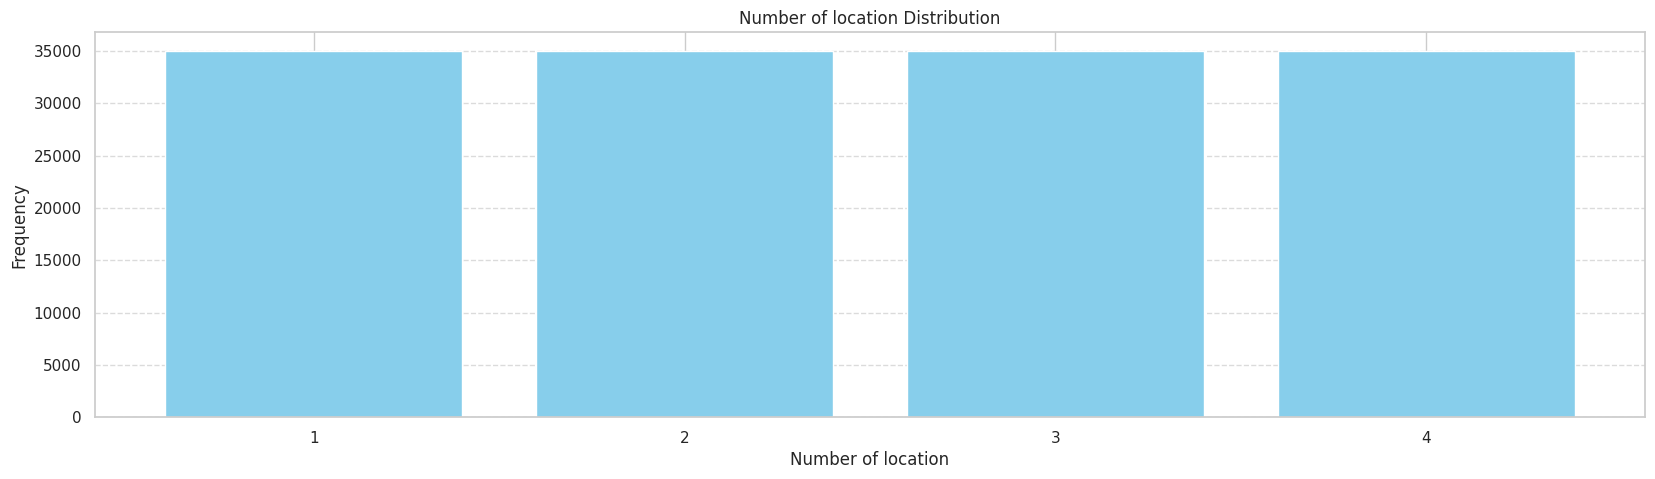

In [55]:
# Count the frequency of each unique number of bedrooms
bathroom_counts = data['Location'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bathroom_counts.index, bathroom_counts.values, color='skyblue')
plt.xlabel('Number of location')
plt.ylabel('Frequency')
plt.title('Number of location Distribution')
plt.xticks(bathroom_counts.index)  # To ensure all x-ticks are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better readability

plt.show()


In [56]:
data.columns.tolist()

['Location',
 'Temp_2m',
 'RelHum_2m',
 'DP_2m',
 'WS_10m',
 'WS_100m',
 'WD_10m',
 'WD_100m',
 'WG_10m',
 'Power',
 'Hour',
 'DayOfWeek',
 'Month',
 'DayOfYear',
 'Hour_sin',
 'Hour_cos']

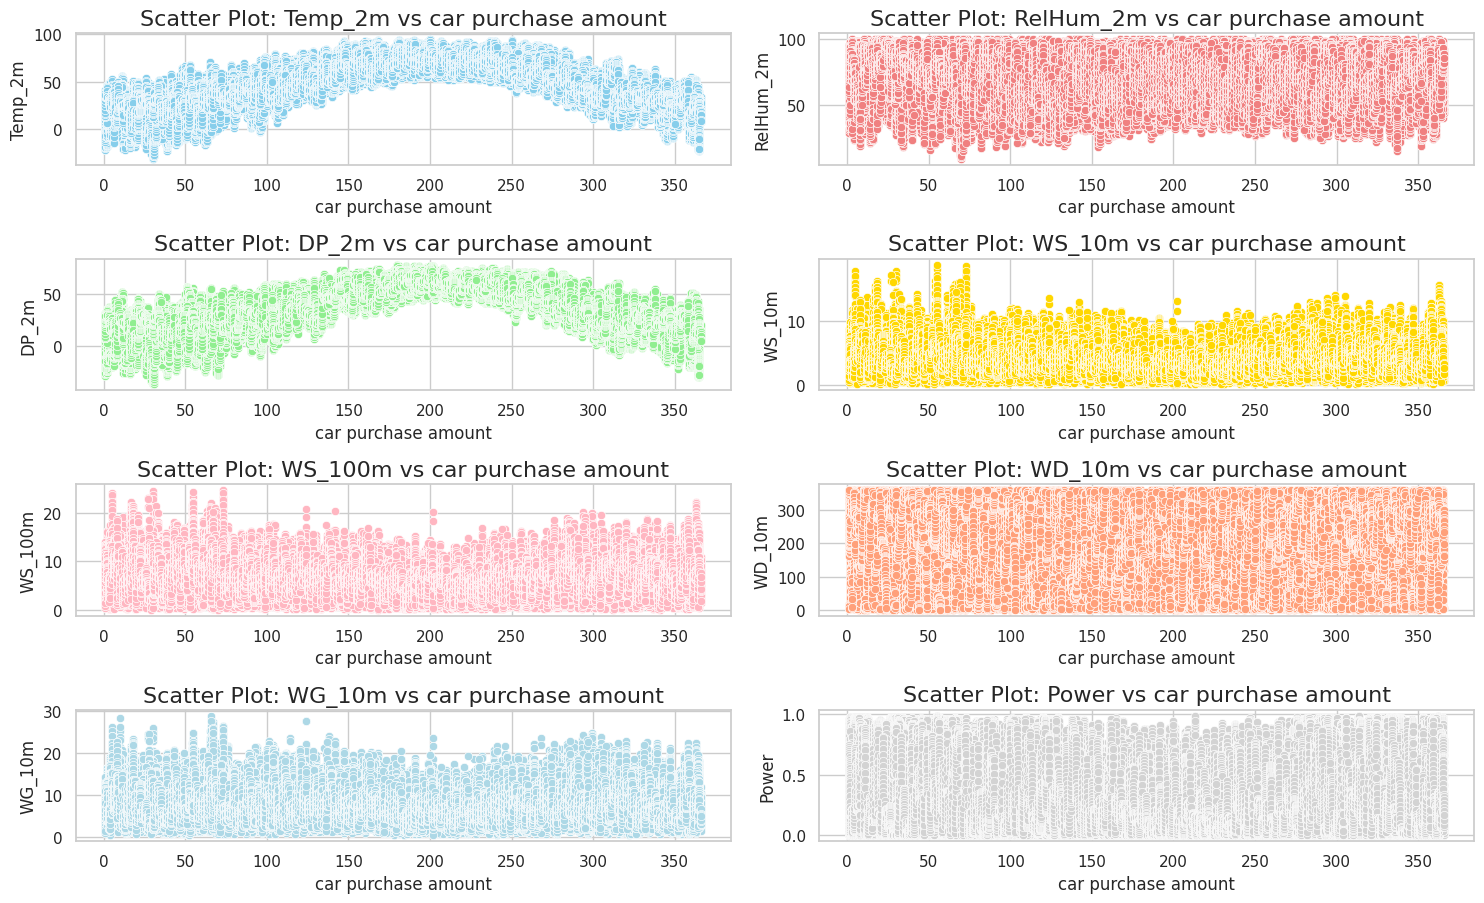

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns for plotting
columns = ['Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m', 'WS_100m', 'WD_10m', 'WG_10m', 'Power']

# Create a 4x2 subplot grid (total 8 subplots)
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Extended colors list to match the number of columns
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightsalmon', 'lightblue', 'lightgray']

# Scatter plot for each column
for i, col in enumerate(columns):
    sns.scatterplot(x='DayOfYear', y=col, data=data, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {col} vs car purchase amount', fontsize=16)
    axes[i].set_xlabel('car purchase amount')
    axes[i].set_ylabel(col)

# If there were more subplots than needed, hide them
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


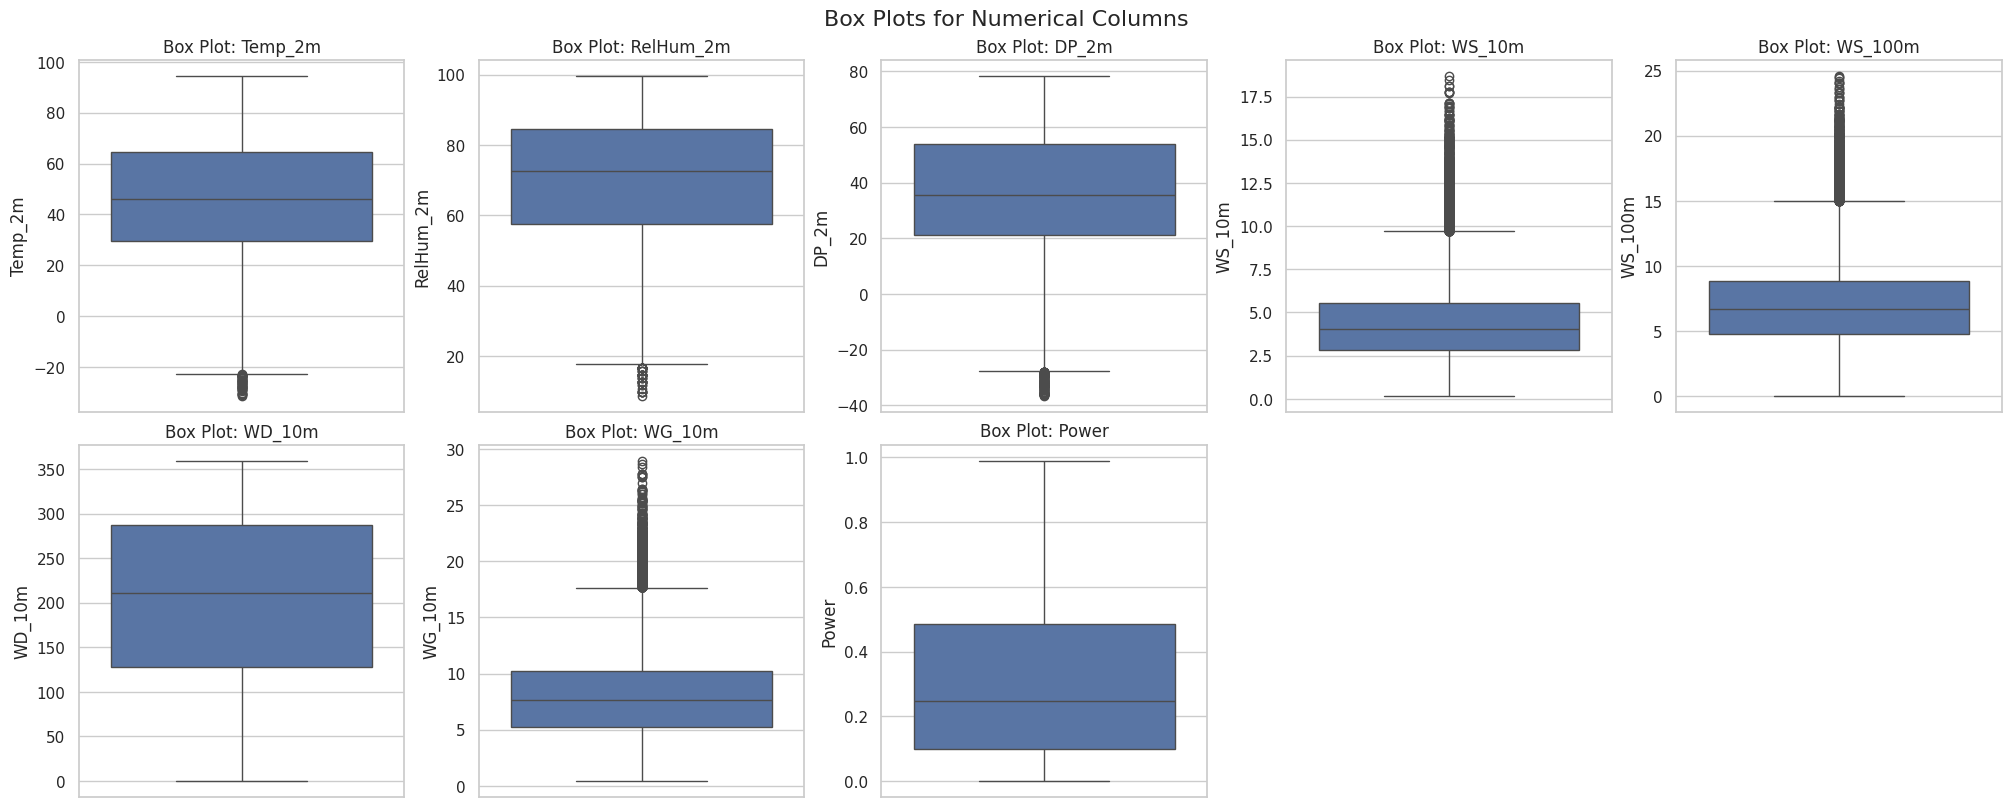

In [58]:
# Set the style
sns.set(style="whitegrid")

# Create box plots for each numerical column
fig, axes = plt.subplots(4, 5, figsize=(20, 15), constrained_layout=True)

# List of numerical columns
numerical_columns = ['Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m', 'WS_100m', 'WD_10m', 'WG_10m','Power']
# Plot each numerical column
for i, col in enumerate(numerical_columns):
    row = i // 5
    col_num = i % 5
    sns.boxplot(y=data[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Box Plot: {col}', fontsize=12)
    axes[row, col_num].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(len(numerical_columns), 20):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Box Plots for Numerical Columns', fontsize=16)
plt.show()

In [59]:
data.columns.tolist()

['Location',
 'Temp_2m',
 'RelHum_2m',
 'DP_2m',
 'WS_10m',
 'WS_100m',
 'WD_10m',
 'WD_100m',
 'WG_10m',
 'Power',
 'Hour',
 'DayOfWeek',
 'Month',
 'DayOfYear',
 'Hour_sin',
 'Hour_cos']

In [60]:
# Function to remove outliers from a specific column using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


data = remove_outliers(data, 'WS_10m')
data = remove_outliers(data, 'WS_100m')
data = remove_outliers(data, 'WG_10m')

In [61]:
len(data)

137440

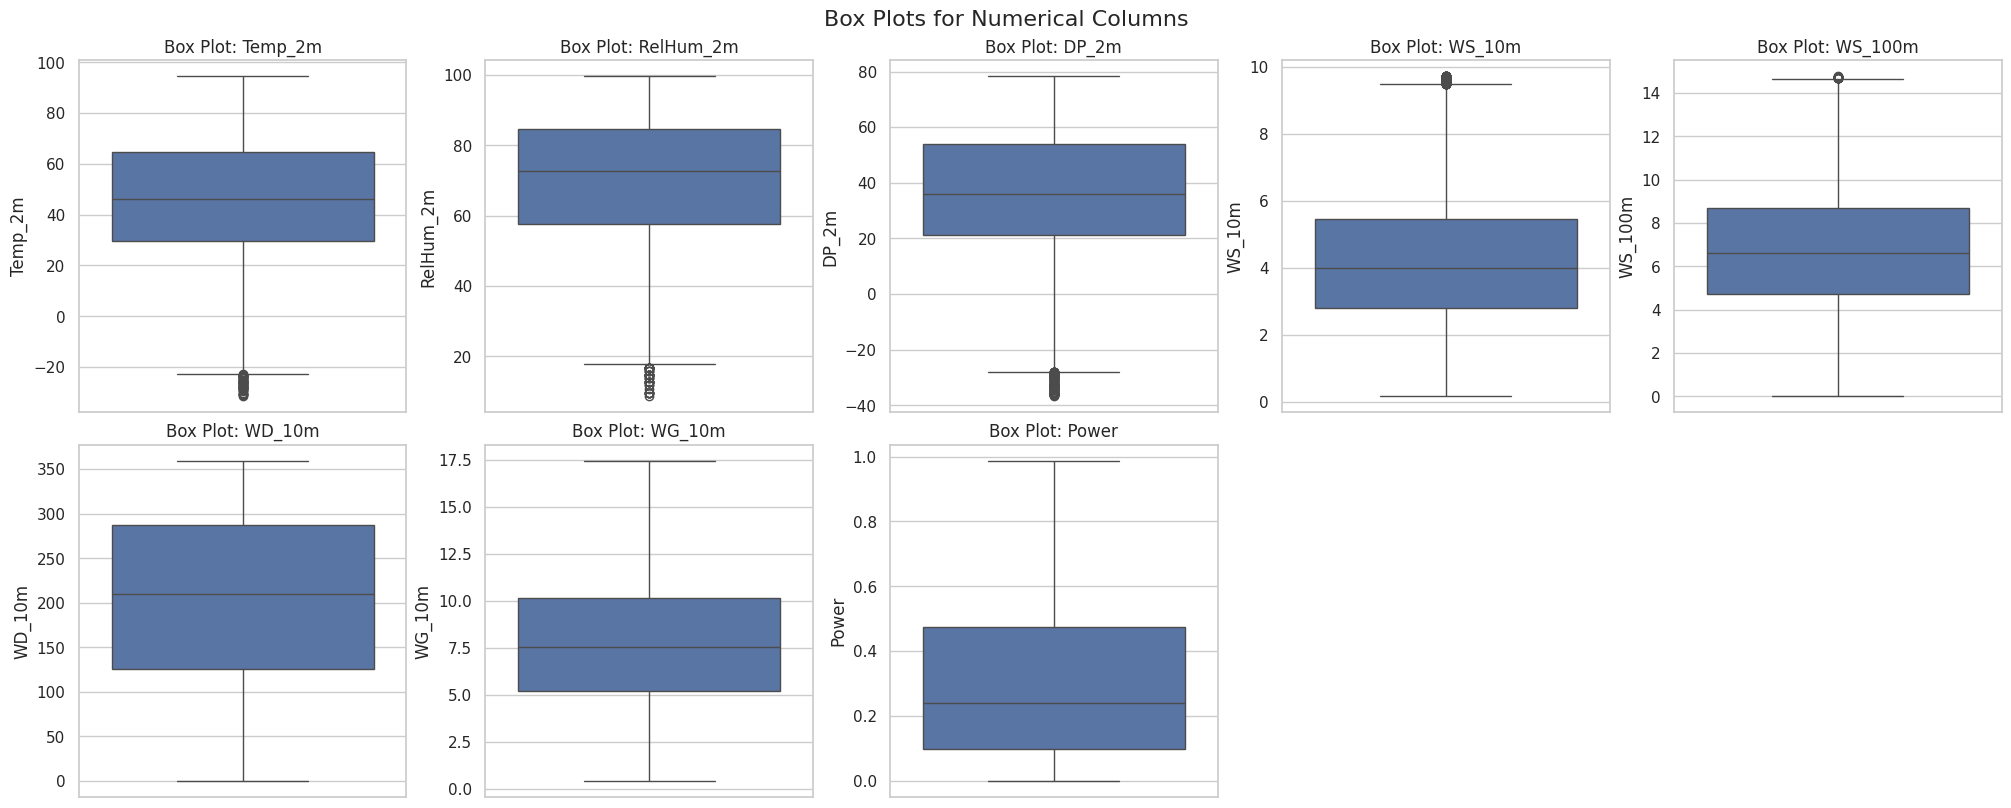

In [62]:
# Set the style
sns.set(style="whitegrid")

# Create box plots for each numerical column
fig, axes = plt.subplots(4, 5, figsize=(20, 15), constrained_layout=True)

# List of numerical columns
numerical_columns = ['Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m', 'WS_100m', 'WD_10m', 'WG_10m','Power']
# Plot each numerical column
for i, col in enumerate(numerical_columns):
    row = i // 5
    col_num = i % 5
    sns.boxplot(y=data[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Box Plot: {col}', fontsize=12)
    axes[row, col_num].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(len(numerical_columns), 20):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Box Plots for Numerical Columns', fontsize=16)
plt.show()

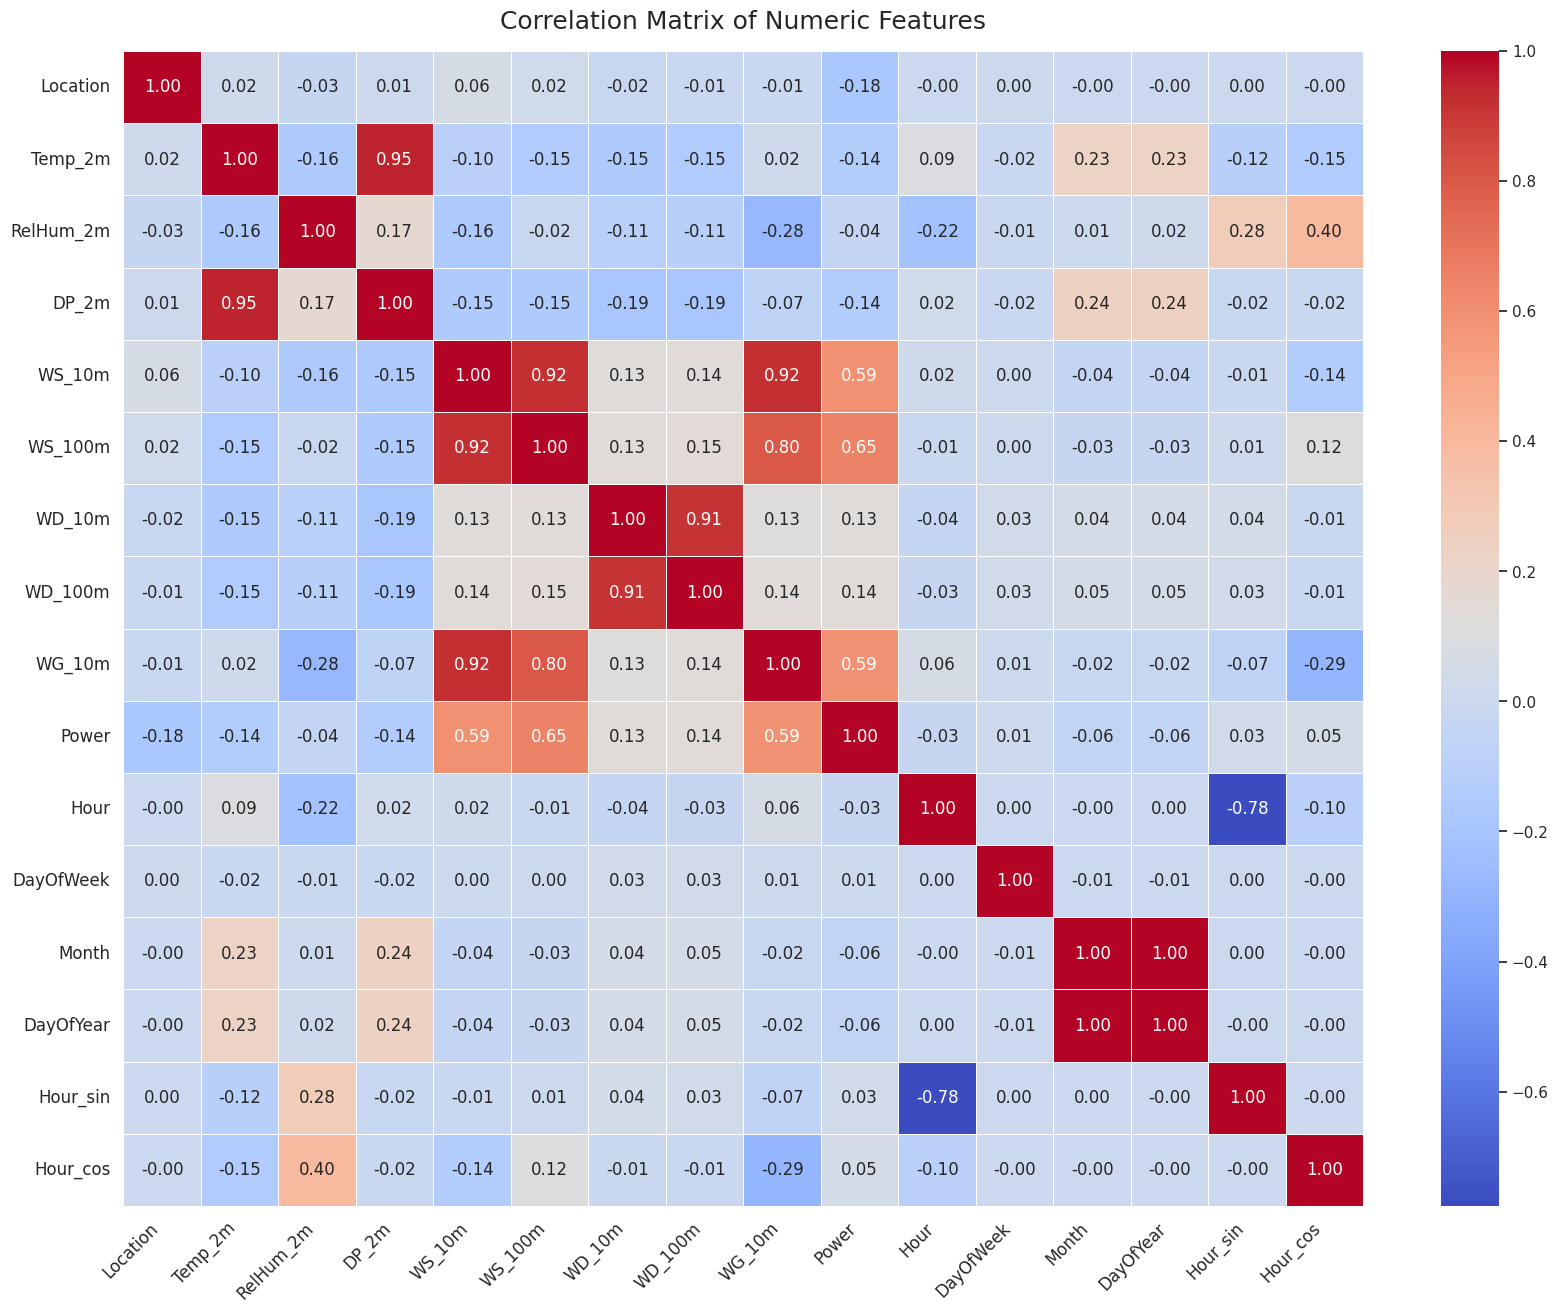

In [63]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')

# Improve the visualization aesthetics
heatmap.set_title('Correlation Matrix of Numeric Features', fontdict={'fontsize': 18}, pad=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [64]:
# Assuming 'data' is your DataFrame
correlation = data.corr()['Power'].sort_values(ascending=True)

# Display the sorted correlation values
print(correlation)


Location    -0.177095
DP_2m       -0.144090
Temp_2m     -0.135431
Month       -0.057546
DayOfYear   -0.056406
RelHum_2m   -0.041055
Hour        -0.029977
DayOfWeek    0.012011
Hour_sin     0.033516
Hour_cos     0.046342
WD_10m       0.129389
WD_100m      0.138579
WG_10m       0.590350
WS_10m       0.591783
WS_100m      0.648992
Power        1.000000
Name: Power, dtype: float64


### **Model Building**



In [65]:
data.head(1)

,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Hour,DayOfWeek,Month,DayOfYear,Hour_sin,Hour_cos
0,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,0,2,1,2,0.0,1.0


In [66]:
# data1 = data.drop(columns=["RelHum_2m"])
data1 = data

# Location    -0.174390
# DP_2m       -0.152323
# Temp_2m     -0.142244
# RelHum_2m   -0.045171

In [67]:
data1.head(5)

,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Hour,DayOfWeek,Month,DayOfYear,Hour_sin,Hour_cos
0,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,0,2,1,2,0.000000,1.000000
1,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396,1,2,1,2,0.258819,0.965926
2,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396,2,2,1,2,0.500000,0.866025
3,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296,3,2,1,2,0.707107,0.707107
4,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296,4,2,1,2,0.866025,0.500000


In [68]:
X = data1.drop(columns=["Power"])
y = data1['Power']

In [69]:
X

,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Hour,DayOfWeek,Month,DayOfYear,Hour_sin,Hour_cos
0,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0,2,1,2,0.000000,1.000000
1,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,1,2,1,2,0.258819,0.965926
2,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,2,2,1,2,0.500000,0.866025
3,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,3,2,1,2,0.707107,0.707107
4,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,4,2,1,2,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140155,4,14.9796,81.664205,10.172595,1.775389,1.867799,149.051683,215.057315,3.236515,19,5,12,366,-0.965926,0.258819
140156,4,8.3796,88.664205,5.572595,3.105389,4.227799,161.051683,174.057315,3.736515,20,5,12,366,-0.866025,0.500000
140157,4,8.4796,88.664205,5.672595,2.765389,5.757799,163.051683,166.057315,4.036515,21,5,12,366,-0.707107,0.707107
140158,4,9.6796,85.664205,6.172595,3.345389,7.537799,166.051683,168.057315,5.336515,22,5,12,366,-0.500000,0.866025


In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
XX_text_scaled = scaler.transform(data_test)

# **Random Forest**

In [38]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor()
# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Define Huber loss calculation (manually)
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * np.square(error)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Calculate Huber loss for the model's predictions
rf_hubber = huber_loss(y_test, y_pred)

# Define a custom error metric (rf_error); feel free to adjust as per your needs
rf_error = np.mean(np.abs(y_test - y_pred) / np.max(np.abs(y_test)))  # Adjust as required

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r2_rf}')
print(f'Huber Loss: {rf_hubber}')
print(f'Error: {rf_error}')


Mean Squared Error: 0.014629551035694948
Mean Absolute Error: 0.0869133346551222
Mean Absolute Percentage Error: 74256.08%
R-squared: 0.7681019353842686
Huber Loss: 0.007314775517847474
Error: 0.08843477662356418


In [75]:
import pandas as pd

# Make predictions on the scaled testing set
y_pred = model.predict(XX_text_scaled)

# Create a DataFrame with the predicted values
df = pd.DataFrame(y_pred, columns=['result'])

# Save the DataFrame to a CSV file
df.to_csv('predictions.csv', index=False)

print("CSV file 'predictions.csv' has been created with the predicted values.")

CSV file 'predictions.csv' has been created with the predicted values.


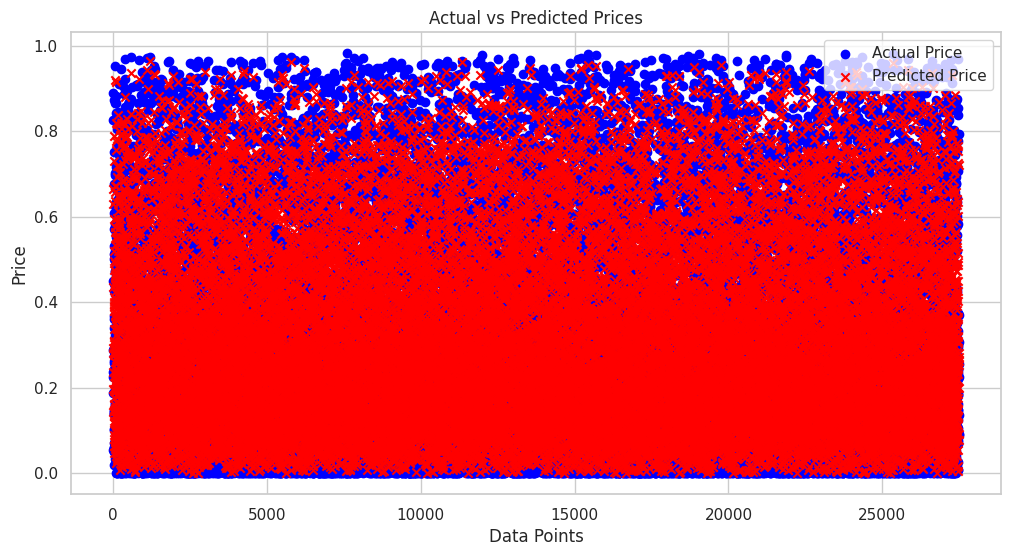

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual Price')  # Actual prices
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Price')  # Predicted prices
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()
